In [4]:
# Dependencies
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [5]:
# Store filepaths in variables.
honda_csv = "small_sample_honda_final.csv"
ford_csv = "small_sample_ford_final.csv"
gm_csv = "small_sample_GM_final.csv"
toyota_csv = "small_sample_toyota_final.csv"
oil_csv = "WTI_Crude_Oil_Quarterly.csv"

In [6]:
# Read CSV File
honda = pd.read_csv(honda_csv)
honda = honda.rename(columns={'Revenue':'Honda Revenue'})
honda.count()

Honda            126
New Date         126
Honda Revenue    126
dtype: int64

In [7]:
# Read CSV File
gm = pd.read_csv(gm_csv, error_bad_lines=False)
gm = gm.rename(columns={'Revenue':'GM Revenue'})
gm.count()

GM            39
New Date      39
GM Revenue    39
dtype: int64

In [8]:
# Read CSV File
toyota = pd.read_csv(toyota_csv)
toyota = toyota.rename(columns={'Revenue':'Toyota Revenue'})
toyota.count()

Toyota            123
New Date          123
Toyota Revenue    123
dtype: int64

In [13]:
honda = pd.read_csv(honda_csv)
honda = honda.rename(columns={'Revenue':'Honda Revenue'})
honda.head()

,Honda,New Date,Honda Revenue
0,33,1988-12-31,6794.810
1,32,1988-9-30,6572.151
2,37,1989-12-31,6559.773
3,34,1989-3-31,7536.918
4,0,1989-3-31,26832.003


In [10]:
# Read CSV File
ford = pd.read_csv(ford_csv)
ford = ford.rename(columns={'Revenue':'Ford Revenue'})
ford.head()

,Ford,New Date,Ford Revenue
0,32,1988-12-31,31586.4
1,36,1989-12-31,24144.9
2,33,1989-3-31,25869.0
3,34,1989-6-30,25889.7
4,35,1989-9-30,20242.3


In [15]:
gm = pd.read_csv(gm_csv)
gm = gm.rename(columns={'Revenue':'GM Revenue'})
gm.head()

,GM,New Date,GM Revenue
0,113,2008-12-31,0.0
1,117,2009-12-31,32327.0
2,114,2009-3-31,22431.0
3,115,2009-6-30,23047.0
4,116,2009-9-30,26784.0


In [9]:
# Create a new column with a new date format for each time serie
import datetime as dt
newer_date3 = []
for dates in toyota['New Date']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    newer_date3.append(s)
toyota["Newer Date"]=newer_date3
toyota.head()

,Toyota,New Date,Toyota Revenue,Newer Date
0,34,1988-12-31,14157.604,1988-12-31
1,33,1988-9-30,15115.341,1988-09-30
2,38,1989-12-31,15118.925,1989-12-31
3,35,1989-3-31,14168.874,1989-03-31
4,0,1989-6-30,55822.168,1989-06-30


In [11]:
# Create a new column with a new date format for each time serie
import datetime as dt
newer_date2 = []
for dates in ford['New Date']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    newer_date2.append(s)
ford["Newer Date"]=newer_date2
ford.head()

,Ford,New Date,Ford Revenue,Newer Date
0,32,1988-12-31,31586.4,1988-12-31
1,36,1989-12-31,24144.9,1989-12-31
2,33,1989-3-31,25869.0,1989-03-31
3,34,1989-6-30,25889.7,1989-06-30
4,35,1989-9-30,20242.3,1989-09-30


In [12]:
# Create a new column with a new date format for each time serie
WTI_crude_oil = pd.read_csv(oil_csv)
WTI_crude_oil = WTI_crude_oil.rename(columns={'Dates':'New Date', 'Last Price':'Crude Oil Price'})

newer_date2 = []
for dates in WTI_crude_oil['New Date']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    newer_date2.append(s)
WTI_crude_oil["Newer Date"]=newer_date2
ford.head()

,Ford,New Date,Ford Revenue,Newer Date
0,32,1988-12-31,31586.4,1988-12-31
1,36,1989-12-31,24144.9,1989-12-31
2,33,1989-3-31,25869.0,1989-03-31
3,34,1989-6-30,25889.7,1989-06-30
4,35,1989-9-30,20242.3,1989-09-30


In [14]:
import datetime as dt
newer_date2 = []
for dates in honda['New Date']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    newer_date2.append(s)
honda["Newer Date"]=newer_date2
honda.head()

,Honda,New Date,Honda Revenue,Newer Date
0,33,1988-12-31,6794.810,1988-12-31
1,32,1988-9-30,6572.151,1988-09-30
2,37,1989-12-31,6559.773,1989-12-31
3,34,1989-3-31,7536.918,1989-03-31
4,0,1989-3-31,26832.003,1989-03-31


In [16]:
import datetime as dt
newer_date2 = []
for dates in gm['New Date']:
    s = dt.datetime.strptime(dates, '%Y-%m-%d')
    newer_date2.append(s)
gm["Newer Date"]=newer_date2
gm.head()

,GM,New Date,GM Revenue,Newer Date
0,113,2008-12-31,0.0,2008-12-31
1,117,2009-12-31,32327.0,2009-12-31
2,114,2009-3-31,22431.0,2009-03-31
3,115,2009-6-30,23047.0,2009-06-30
4,116,2009-9-30,26784.0,2009-09-30


In [17]:
# Compile the list of dataframes
data_frames = [WTI_crude_oil, ford, honda, gm, toyota]

In [18]:
# Merge two dataframes
df_merged = pd.merge(WTI_crude_oil, ford, on="Newer Date")

In [19]:
# Reorganize, merge and sort dataframe
df_m_o = df_merged[['Newer Date', 'Crude Oil Price','Ford Revenue']]
df_mo=df_m_o.sort_values("Newer Date", ascending=True)
df_mo


,Newer Date,Crude Oil Price,Ford Revenue
119,1988-12-31,17.24,31586.4
118,1989-03-31,20.19,25869.0
117,1989-06-30,20.27,25889.7
116,1989-09-30,20.13,20242.3
115,1989-12-31,21.82,24144.9
114,1990-03-31,20.28,23600.6
113,1990-06-30,17.07,26871.7
112,1990-09-30,39.51,22986.9
111,1990-12-31,28.44,24190.8
110,1991-03-31,19.63,21341.0


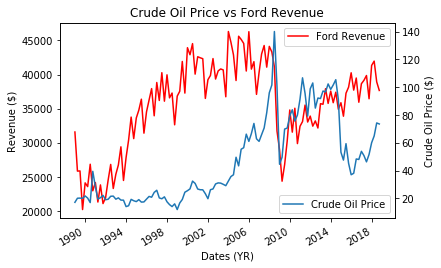

In [46]:
# Plot graph crude oil vs ford
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_mo['Newer Date'], df_mo['Ford Revenue'], label="Ford Revenue", color="r")
ax1.legend(loc="upper right")
ax2.plot(df_mo['Newer Date'], df_mo['Crude Oil Price'],label="Crude Oil Price")
ax2.legend(loc="lower right")
ax1.set_ylabel("Revenue ($)")
ax2.set_ylabel("Crude Oil Price ($)")
ax1.set_xlabel("Dates (YR)")
plt.title("Crude Oil Price vs Ford Revenue")

plt.savefig("Crude Oil Price vs Ford Revenue")
fig.autofmt_xdate()

In [22]:
# Reorganize, merge and sort dataframe
df_merged2 = pd.merge(WTI_crude_oil, toyota, on="Newer Date")
df_m_o = df_merged2[['Newer Date', 'Crude Oil Price','Toyota Revenue']]
df_mo2=df_m_o.sort_values("Newer Date", ascending=True)
df_mo2

# Reduce timeframe in order to remove outliers 
start_date = '2000-12-31'
end_date = '2018-10-31'
mask = (df_mo2['Newer Date'] > start_date) & (df_mo2['Newer Date'] <= end_date)
df_mo2.loc[mask]
df = df_mo2.loc[mask]

df.count()

Newer Date         70
Crude Oil Price    70
Toyota Revenue     70
dtype: int64

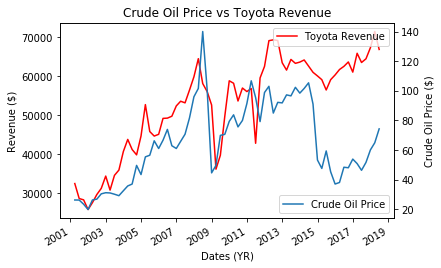

In [47]:
# Plot graph crude oil vs toyota
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df['Newer Date'], df['Toyota Revenue'],label="Toyota Revenue", color="r")
ax1.legend(loc="upper right")
ax2.plot(df['Newer Date'], df['Crude Oil Price'],label="Crude Oil Price")
ax2.legend(loc="lower right")
ax1.set_ylabel("Revenue ($)")
ax2.set_ylabel("Crude Oil Price ($)")
ax1.set_xlabel("Dates (YR)")
plt.title("Crude Oil Price vs Toyota Revenue")

plt.savefig("Crude Oil Price vs Toyota Revenue")
fig.autofmt_xdate()

In [24]:
# Reorganize, merge and sort dataframe
df_merged3 = pd.merge(WTI_crude_oil, honda, on="Newer Date")
df_m_o = df_merged3[['Newer Date', 'Crude Oil Price','Honda Revenue']]
df_mo3=df_m_o.sort_values("Newer Date", ascending=True)
df_mo3

# Reduce timeframe in order to remove outliers 
start_date = '2000-12-31'
end_date = '2018-10-31'
mask = (df_mo3['Newer Date'] > start_date) & (df_mo3['Newer Date'] <= end_date)
df_mo3.loc[mask]
df_3 = df_mo3.loc[mask]

df_3.count()

Newer Date         70
Crude Oil Price    70
Honda Revenue      70
dtype: int64

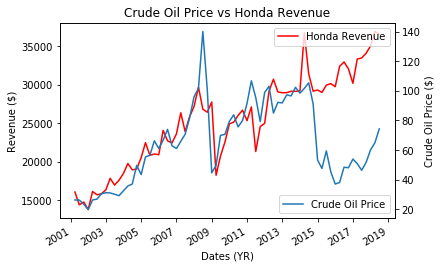

In [43]:
# Plot graph crude oil vs honda
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_3['Newer Date'], df_3['Honda Revenue'],label="Honda Revenue", color="r")
ax1.legend(loc="upper right")
ax2.plot(df_3['Newer Date'], df_3['Crude Oil Price'],label="Crude Oil Price")
ax2.legend(loc="lower right")
ax1.set_ylabel("Revenue ($)")
ax2.set_ylabel("Crude Oil Price ($)")
ax1.set_xlabel("Dates (YR)")
plt.title("Crude Oil Price vs Honda Revenue")

plt.savefig("Crude Oil Price vs Honda Revenue")
fig.autofmt_xdate()

In [26]:
# Reorganize, merge and sort dataframe
df_merged4 = pd.merge(WTI_crude_oil, gm, on="Newer Date")
df_m_o = df_merged4[['Newer Date', 'Crude Oil Price','GM Revenue']]
df_mo4=df_m_o.sort_values("Newer Date", ascending=True)
df_mo4

,Newer Date,Crude Oil Price,GM Revenue
38,2008-12-31,44.60,0.0
37,2009-03-31,49.66,22431.0
36,2009-06-30,69.89,23047.0
35,2009-09-30,70.61,26784.0
34,2009-12-31,79.36,32327.0
33,2010-03-31,83.76,31476.0
32,2010-06-30,75.63,33174.0
31,2010-09-30,79.97,34060.0
30,2010-12-31,91.38,36882.0
29,2011-03-31,106.72,36194.0


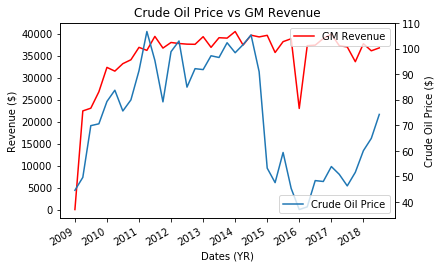

In [44]:
# Plot graph crude oil vs GM
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df_mo4['Newer Date'], df_mo4['GM Revenue'],label="GM Revenue", color='r')
ax1.legend(loc="upper right")
ax2.plot(df_mo4['Newer Date'], df_mo4['Crude Oil Price'],label="Crude Oil Price")
ax2.legend(loc="lower right")
ax1.set_ylabel("Revenue ($)")
ax2.set_ylabel("Crude Oil Price ($)")
ax1.set_xlabel("Dates (YR)")
plt.title("Crude Oil Price vs GM Revenue")

plt.savefig("Crude Oil Price vs GM Revenue")
fig.autofmt_xdate()